 ![](newyork_city.jpg)

# <center> New York City Government Job Listings </center> 
#### <center> An Analysis by Angela Zhou </center>

## Intro
The job market and the job security of a field are two aspects that many college students or even younger audiences think about prior to narrowing their field of study and declaring a major. The job market may also be an area that many be foreign to a  portion of college students, at least prior to their internship or job search. Job prospects is a topic that is very important to a majority of college students and this project provides some analysis of avaliable government jobs in New York City. This analysis looks at several aspects of job listings and their relevance to salary. This analysis mainly look at the salary compensation by different characteristics of the job listings but I hope this analysis will also help the reader have a better understanding job avaliability in differnt fields. I hope that this project can encourage viewers to be more motivated in their job search and to have a brighter outlook towards their future career.



## Background
This analysis is written in python using Jupyter Notebook.

The data I used for this analysis is from US goverment's DATA.GOV website through the following link: https://catalog.data.gov/dataset/nyc-jobs-26c80. The data in the CSV contains the current job postings available on the City of New York’s official jobs site(http://www.nyc.gov/html/careers/html/search/search.shtml) as of December 8, 2018.

This analysis looks at several aspects of the New York City Government job market including the proportions of job listings regarding to time commitment and position type, in addition to salary analysis with considerations of various aspects of the job listings. This analysis also aim to display career projection through salary increase by job levels.

The goal of this analysis is to help the readers have a better understanding of the job market and the career paths that they can take prior to coming out or even prior to entering college. This analysis is aimed to educate the viewers and hopefully help motivate the readers to be more active in their job search and to have a more optimistic mindset. 


## Setup
The following is a list of libraries that we need for this analysis. All of the following libraries are written for Python programming language.

* The Pandas library is used to manipulate and analyze data. It provides data structures and operations for manipulating numerical tables and time series. 

* The NumPy library provides support for large, multi-dimensional arrays and matrices. It also contain a large collection of high-level mathematical functions that can be used on the previously mentioned arrays.

* The Seaborn library Seaborn is a visualization library based on matplotlib. It creates a high-level interface for informative statistical graphics.

* The Matplotlib.pyplot is an interfact to matplotlib and it is used to create interactive plots and simple cases of programmatic plot.

* The Counter tool from collections support convenient and rapid tallies. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Data Collection and initial processing
In the following, data is loaded from the NYC_Jobs.csv, stored in a dataframe using pandas and prepped for analysis. Only the relevant columns were retained from the original Comma-separated values(CSV) file and values are replaced for a neater display. The following table displays the dataframe after initial prepping.

In [3]:
# The original unedited table that I am working with for this project
original_data = pd.read_csv("NYC_Jobs.csv")
# The edited table with only data columns I need for this project
data = original_data[['Job ID','Agency','Posting Type','Level','Job Category',
                      'Full-Time/Part-Time indicator','Salary Range From','Salary Range To','Salary Frequency']]
# Rename F as Full Time and P as Part time
data = data.replace('F', 'Full Time').replace('P', 'Part Time')
data.head()

,Job ID,Agency,Posting Type,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency
0,274342,OFFICE OF MANAGEMENT & BUDGET,Internal,1,"Finance, Accounting, & Procurement Policy, Res...",Full Time,43618.0,43618.0,Annual
1,376119,TAXI & LIMOUSINE COMMISSION,Internal,2,Legal Affairs,Full Time,66326.0,88000.0,Annual
2,375443,DEPARTMENT OF CITY PLANNING,External,0,Administration & Human Resources,Full Time,37217.0,52000.0,Annual
3,376119,TAXI & LIMOUSINE COMMISSION,External,2,Legal Affairs,Full Time,66326.0,88000.0,Annual
4,274342,OFFICE OF MANAGEMENT & BUDGET,External,1,"Finance, Accounting, & Procurement Policy, Res...",Full Time,43618.0,43618.0,Annual


The main focus for this anlysis will be the salary correspondence to different characteristics of the job listing such as levels and job categories. However, we will also briefly analyze other key aspects which as the posting type and Full-Time/Part-Time distributions of the job listings.

## Basic Statistics
The following are some initial analysis on the distribution of internal and external listings along with the distribution of Full time and Part time job positions open in the market. The distribution of each type of listing is counted by the counter tool from collections. The resulting data is them displayed by pie charts which suit the following two analysis since both traits has 3 or less categories. 

(          Job Listing Count
 Internal               2011
 External               1644,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f44c57719b0>)

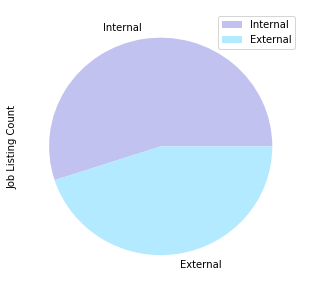

In [4]:
# counts the number of internal and external postings using the counter tool from collection
counter = Counter(data['Posting Type'])
# create a dataframe from counter of internal and external job listing counts
internal_external = pd.DataFrame.from_dict(counter, orient='index', columns=['Job Listing Count'])
colors = ['#c2c2f0','#b3eaff']
internal_external, internal_external.plot.pie('Job Listing Count', figsize=(5, 5), colors=colors) 

The previous displays the count of internal and external job listing which is 2011 for internal and 1644 for external.
From the display of the pie chart, we can see that there is a discrepancy between the number of job listings avaliable for internal and external candidates. Without further data on percentage of internal and external candidates hired, we can not determine if internal candidates have significant advantages over external candidates.

(           Job Listing Count
 Full Time               3158
 NaN                      272
 Part Time                225,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f44c3723710>)

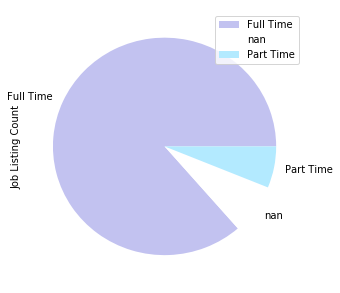

In [5]:
# counts the number of part time and full time postings
counter2 = Counter(data['Full-Time/Part-Time indicator'])
# create a dataframe from counter of part time and full time job listings
internal_external = pd.DataFrame.from_dict(counter2, orient='index', columns=['Job Listing Count'])
colors = ['#c2c2f0','#ffffff','#b3eaff']
internal_external, internal_external.plot.pie('Job Listing Count', figsize=(5, 5), colors=colors) 

The previous displays the count of part time and full time job listings. The previous display also include the 225 listing that does not specify whether it is for a full time or part time position. A much larger portion of the job listing are for full time which indicate that it might be more difficult for people such as students or homemakers whom do not have the avaliability for a full time job but is still in the search for a job.

## Salary Analysis

I first made a deep copy of the data we are using so I impliment further data wrangling. I them added a mean column which is the average of the salary range from and salary range to. I also dropped entries that did not use annual salary calculation to eliminate salary discrepency when calculating the prorated salary. This reduced the number of entries from 3655 to 3331 which did not significantly reduce the amount of job entries. I also dropped the columns that were also used by previous analysis and are no longer needed from this point on.

The next step I did to further clean the data was to eliminate duplicate job listings. For job positions avaliable for both internal and external candidates, the job is listed twice in the CSV. To eliminate the duplicates, I identified the duplicates by Job ID and aggregated the two listing into 1. This futher reduce the listings from 3331 listings which contained duplicates  to 1822 unique listing. Since the duplicate listings only differed in Posting type which is not needed for analysis from this point on, the posting type column can be dropped.

I also sorted the listing by Mean Salary.

In [6]:
# data_ updated is a deep copy of data
data_updated = data.copy()
data_updated.loc[:,'Mean Salary'] =(data_updated.loc[:,'Salary Range From'] + data_updated.loc[:,'Salary Range To'])/2
# Only keeps annual salary entries
data_updated = data_updated[data_updated['Salary Frequency'] == 'Annual'] 
# drop columns already used and no long needed for analysis
data_updated = data_updated.drop(['Posting Type','Full-Time/Part-Time indicator','Salary Frequency'], axis =1)

# combine listing with the same job id 
aggregation_functions = {'Agency': 'first', 'Level': 'first', 'Job Category': 'first', 
                         'Salary Range From': 'mean', 'Salary Range To': 'mean', 'Mean Salary': 'mean'}
# aggregate duplicate listings
data_updated = data_updated.groupby('Job ID', as_index=False).aggregate(aggregation_functions).reindex(columns=data_updated.columns)
# sort and reindexed by mean salary 
data_sorted= data_updated.copy().sort_values('Mean Salary', ascending=False).reset_index(drop=True)
data_sorted=data_sorted.fillna("Not Avaliable")
data_sorted.head()

,Job ID,Agency,Level,Job Category,Salary Range From,Salary Range To,Mean Salary
0,321570,DEPT OF ENVIRONMENT PROTECTION,M7,"Engineering, Architecture, & Planning Finance,...",209585.0,209585.0,209585.0
1,321554,DEPT OF ENVIRONMENT PROTECTION,M7,"Engineering, Architecture, & Planning Finance,...",209585.0,209585.0,209585.0
2,363144,FINANCIAL INFO SVCS AGENCY,M9,"Administration & Human Resources Finance, Acco...",184593.0,226366.0,205479.5
3,197355,DEPT OF ENVIRONMENT PROTECTION,M7,"Engineering, Architecture, & Planning Maintena...",198518.0,198518.0,198518.0
4,371781,NYC EMPLOYEES RETIREMENT SYS,M7,"Technology, Data & Innovation",160000.0,224749.0,192374.5


#### Mean salary statistics by job levels
The following are some surface statistics of the mean salary for every job level. The statics are generated by .describe(). The levels are also ranked in decending order by the 50%(median) salary.


In [7]:
level_analysis = data_sorted.copy()
#drop all columns not needed to be displayed 
level_analysis = level_analysis.drop(['Job ID','Agency', 'Job Category','Salary Range From', 'Salary Range To'], axis =1)
# grouped the mean salary by the level of the job position
level_summary = level_analysis.groupby('Level').describe().sort_values(by=('Mean Salary', '50%'), ascending=False)
level_summary

Mean Salary                                                      \
            count           mean           std        min         25%   
Level                                                                   
M9            1.0  205479.500000           NaN  205479.50  205479.500   
M7            9.0  185671.000000  18104.813959  162051.00  177125.500   
M5           11.0  150957.000000  26021.317211  111395.00  137772.000   
M4           35.0  129880.728571  13272.963214   87669.00  130000.000   
M3           53.0  113623.613208  14748.939679   78530.00  109030.000   
4B            6.0  107501.230000   4674.042210  100984.38  104110.625   
4A            5.0   99936.164000   1199.857510   98387.82   98884.000   
M2           74.0   96273.924324  15824.546993   65217.50   85217.500   
M1          127.0   88662.651181  15463.671007   57500.00   75821.500   
4            40.0   79342.880500  28270.225275   41758.56   47864.500   
3           197.0   75035.836345  23102.743429   36415.50   49236.500   
MY            1.0   75000.000000           NaN   75000.00   75000.000   
2           359.0   71281.744568  14693.372864   32839.00   60592.000   
0           558.0   68064.659731  18767.185427   27578.50   55821.000   
1           343.0   58956.420117  12117.369439   30493.50   50849.500   
3A            3.0   55076.413333  24061.628455   37973.74   41319.370   

                                         
             50%         75%        max  
Level                                    
M9     205479.50  205479.500  205479.50  
M7     182374.50  198518.000  209585.00  
M5     145544.00  167500.000  190000.00  
M4     134866.50  134866.500  167500.00  
M3     122500.00  122966.500  132500.00  
4B     110511.50  110511.500  110511.50  
4A     100803.00  100803.000  100803.00  
M2      98608.75  110966.000  130000.00  
M1      87321.50  102507.000  135000.00  
4       81899.50  106326.125  120474.50  
3       80347.00   92304.000  164036.72  
MY      75000.00   75000.000   75000.00  
2       73576.00   82678.500   99637.50  
0       66430.00   80275.625  128741.50  
1       57055.00   66644.500   93500.00  
3A      44665.00   63627.750   82590.50

As expected, there is a general trend between with management job positions paying more relative to regular job positions. There is also a general increasing trend in salary as the numeric number in the position level increases. The discrepancies in the order for 0, 1, and 3A may be due to the field or row of the job which I have not yet distinguished at this point.

### Salary analysis by job category
From this point on, I will analyze the salary for the job listings by job categories provided on the nyc.gov website along with any remain job categories not listed by is included in the Job Categories column. I looked for every job categories in the string contained in the Job Categories column. I grouped each job listing by the different job categories that it is listed under and I identified this with additional columns one for each category. The dataframe created for each job category type will later be concatenated to create the dataframe needed for display the violin plot.


In [8]:
# dataframe with all listings in the category Administration & Human Resources
admin_human_resource = data_sorted[data_sorted['Job Category'].str.contains('Administration & Human Resources')] 
# list of admin_human_resources dataframe job id
admin_human_resource_list = admin_human_resource['Job ID'].tolist()
# update data_sorted with new Administration & Human Resources column identidfing if job is listed in that category
data_sorted['Administration & Human Resources'] = data_sorted['Job ID'].isin(admin_human_resource_list)

# repeat the same steps for Communications & Intergovernmental Affairs
comm_intergov = data_sorted[data_sorted['Job Category'].str.contains('Communications & Intergovernmental Affairs')] 
comm_intergov_list = comm_intergov['Job ID'].tolist()
data_sorted['Communications & Intergovernmental Affairs'] = data_sorted['Job ID'].isin(comm_intergov_list)

# Constituent Services & Community Programs
const_serv_comm = data_sorted[data_sorted['Job Category'].str.contains('Constituent Services & Community Programs')] 
const_serv_comm_list = const_serv_comm['Job ID'].tolist()
data_sorted['Constituent Services & Community Programs'] = data_sorted['Job ID'].isin(const_serv_comm_list)

# Engineering, Architecture & Planning
engr_arch_plann = data_sorted[data_sorted['Job Category'].str.contains('Engineering, Architecture, & Planning')] 
engr_arch_plann_list = engr_arch_plann['Job ID'].tolist()
data_sorted['Engineering, Architecture, & Planning'] = data_sorted['Job ID'].isin(engr_arch_plann_list)

# Finance, Accounting, & Procurement
fin_acc_pro = data_sorted[data_sorted['Job Category'].str.contains('Finance, Accounting, & Procurement')] 
fin_acc_pro_list = fin_acc_pro['Job ID'].tolist()
data_sorted['Finance, Accounting, & Procurement'] = data_sorted['Job ID'].isin(fin_acc_pro_list)

# Health
health = data_sorted[data_sorted['Job Category'].str.contains('Health')] 
health_list = health['Job ID'].tolist()
data_sorted['Health'] = data_sorted['Job ID'].isin(health_list)

# Technology, Data & Innovation
tec_data_inno = data_sorted[data_sorted['Job Category'].str.contains('Technology, Data & Innovation')] 
tec_data_inno_list = tec_data_inno['Job ID'].tolist()
data_sorted['Technology, Data & Innovation'] = data_sorted['Job ID'].isin(tec_data_inno_list)

# Legal Affairs
legal_affairs = data_sorted[data_sorted['Job Category'].str.contains('Legal Affairs')] 
legal_affairs_list = legal_affairs['Job ID'].tolist()
data_sorted['Legal Affairs'] = data_sorted['Job ID'].isin(legal_affairs_list)

# Legal 
legal = data_sorted[data_sorted['Job Category'].str.contains('Legal')] 
legal_list = legal['Job ID'].tolist()
data_sorted['Legal'] = data_sorted['Job ID'].isin(legal_list)

# Building Operations & Maintenance
build_op_main = data_sorted[data_sorted['Job Category'].str.contains('Building Operations & Maintenance')] 
build_op_main_list = build_op_main['Job ID'].tolist()
data_sorted['Building Operations & Maintenance'] = data_sorted['Job ID'].isin(build_op_main_list)

# Policy, Research & Analysis
pol_res_analy = data_sorted[data_sorted['Job Category'].str.contains('Policy, Research & Analysis')] 
pol_res_analy_list = pol_res_analy['Job ID'].tolist()
data_sorted['Policy, Research & Analysis'] = data_sorted['Job ID'].isin(pol_res_analy_list)

# Policy & Analysis
policy_analy = data_sorted[data_sorted['Job Category'].str.contains('Policy & Analysis')] 
policy_analy_list = policy_analy['Job ID'].tolist()
data_sorted['Policy & Analysis'] = data_sorted['Job ID'].isin(policy_analy_list)

# Public Safety, Inspections, & Enforcement
pub_saf_ins_enf = data_sorted[data_sorted['Job Category'].str.contains('Public Safety, Inspections, & Enforcement')] 
pub_saf_ins_enf_list = pub_saf_ins_enf['Job ID'].tolist()
data_sorted['Public Safety, Inspections, & Enforcement'] = data_sorted['Job ID'].isin(pub_saf_ins_enf_list)

# Social Services
soc_serv = data_sorted[data_sorted['Job Category'].str.contains('Social Services')] 
soc_serv_list = soc_serv['Job ID'].tolist()
data_sorted['Social Services'] = data_sorted['Job ID'].isin(soc_serv_list)

# Information Technology & Telecommunications
info_tec_tel = data_sorted[data_sorted['Job Category'].str.contains('Information Technology & Telecommunications')] 
info_tec_tel_list = info_tec_tel['Job ID'].tolist()
data_sorted['Information Technology & Telecommunications'] = data_sorted['Job ID'].isin(info_tec_tel_list)

# Clerical & Administrative Support
cler_adm_sup = data_sorted[data_sorted['Job Category'].str.contains('Clerical & Administrative Support')] 
cler_adm_sup_list = cler_adm_sup['Job ID'].tolist()
data_sorted['Clerical & Administrative Support'] = data_sorted['Job ID'].isin(cler_adm_sup_list)

# Community & Business Services  
comm_bus = data_sorted[data_sorted['Job Category'].str.contains('Community & Business Services')] 
comm_bus_list = comm_bus['Job ID'].tolist()
data_sorted['Community & Business Services'] = data_sorted['Job ID'].isin(comm_bus_list)

# Maintenance & Operations
main_op = data_sorted[data_sorted['Job Category'].str.contains('Maintenance & Operations')] 
main_op_list = main_op['Job ID'].tolist()
data_sorted['Maintenance & Operations'] = data_sorted['Job ID'].isin(main_op_list)


# Job Category no longer needed since individual category is now marked in a column
data_sorted = data_sorted.drop(['Job Category'], axis = 1)
data_sorted.head()

,Job ID,Agency,Level,Salary Range From,Salary Range To,Mean Salary,Administration & Human Resources,Communications & Intergovernmental Affairs,Constituent Services & Community Programs,"Engineering, Architecture, & Planning",...,Legal,Building Operations & Maintenance,"Policy, Research & Analysis",Policy & Analysis,"Public Safety, Inspections, & Enforcement",Social Services,Information Technology & Telecommunications,Clerical & Administrative Support,Community & Business Services,Maintenance & Operations
0,321570,DEPT OF ENVIRONMENT PROTECTION,M7,209585.0,209585.0,209585.0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,321554,DEPT OF ENVIRONMENT PROTECTION,M7,209585.0,209585.0,209585.0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
2,363144,FINANCIAL INFO SVCS AGENCY,M9,184593.0,226366.0,205479.5,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,197355,DEPT OF ENVIRONMENT PROTECTION,M7,198518.0,198518.0,198518.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,371781,NYC EMPLOYEES RETIREMENT SYS,M7,160000.0,224749.0,192374.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The updated chart is sorted by mean salary and contains columns for each job category. Each job listing is identified for job categories that it fits under by the value "true" for that column under the category column.

#### Count of Job Listings by Categories
The following displays the number of jobs listing by job function category. The list is also sorted from the categories with the most job opening to the least job openings.

In [9]:
# Only getting the columns with the job categories 
job_categories = data_sorted.copy().drop(['Job ID','Agency','Level', 'Salary Range From', 'Salary Range To', 'Mean Salary'], 
                                         axis = 1)
# Count the number of job listings per job function category and return a dataframe
job_categories_sum = pd.DataFrame(job_categories.sum(), columns=['Sum of Job Listings'])
# sort the resulting dataframe by the number of listings
job_categories_sum = job_categories_sum.sort_values('Sum of Job Listings', ascending=False) 
job_categories_sum 

,Sum of Job Listings
"Engineering, Architecture, & Planning",400
Health,306
"Policy, Research & Analysis",267
"Technology, Data & Innovation",262
"Public Safety, Inspections, & Enforcement",211
"Finance, Accounting, & Procurement",192
Administration & Human Resources,170
Legal,159
Legal Affairs,153
Constituent Services & Community Programs,124


#### Visual display of job listing by job Categories

Text(0,0.5,'')

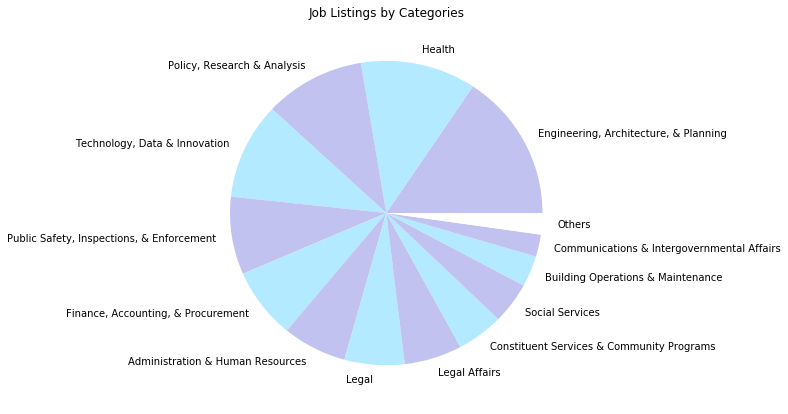

In [10]:
# copy the job_categories_sum dataframe so we can combine categories with less than 50 listing into others for a cleaner display
job_categories_sum_pie = job_categories_sum.copy()
job_categories_sum_pie.loc['Others'] = job_categories_sum_pie[13:18].sum()
job_categories_sum_pie = job_categories_sum_pie.drop(['Maintenance & Operations', 'Community & Business Services', 
                                                      'Policy & Analysis', 'Clerical & Administrative Support',
                                                      'Information Technology & Telecommunications'])
colors = ['#c2c2f0','#b3eaff','#c2c2f0','#b3eaff','#c2c2f0','#b3eaff','#c2c2f0',
          '#b3eaff','#c2c2f0','#b3eaff','#c2c2f0','#b3eaff','#c2c2f0', '#ffffff']
job_pie = job_categories_sum_pie['Sum of Job Listings'].plot(kind='pie',figsize = (7,7), colors=colors,
                                                             title = 'Job Listings by Categories')
# remove the label on the left side for cleaner display
job_pie.set_ylabel('')

The largestest category for job listings is Engineering, Architecture, & Planning, with Health, Policy, Research & Analysis, and Technology, Data & Innovations following closely behind.

In [11]:
# repeate analysis for top 100 salary job listings by salary

# getting the top 100 paying job listings
job_categories_top_100 = data_sorted.copy().head(100)
# Only getting the columns with the job categories 
job_categories_top_100 = job_categories_top_100.drop(['Job ID','Agency','Level', 'Salary Range From', 'Salary Range To',
                                                      'Mean Salary'], axis = 1)
# Count the number of job listings per job function category and return a dataframe
job_categories_top_100_sum = pd.DataFrame(job_categories_top_100.sum(), columns=['Sum of Job Listings'])
# sort the resulting dataframe by the number of listings
job_categories_top_100_sum = job_categories_top_100_sum.sort_values('Sum of Job Listings', ascending=False) 
job_categories_top_100_sum

,Sum of Job Listings
"Engineering, Architecture, & Planning",39
"Technology, Data & Innovation",24
"Policy, Research & Analysis",15
"Finance, Accounting, & Procurement",15
Legal Affairs,11
Legal,11
"Public Safety, Inspections, & Enforcement",10
Administration & Human Resources,7
Constituent Services & Community Programs,5
Building Operations & Maintenance,4


Text(0,0.5,'')

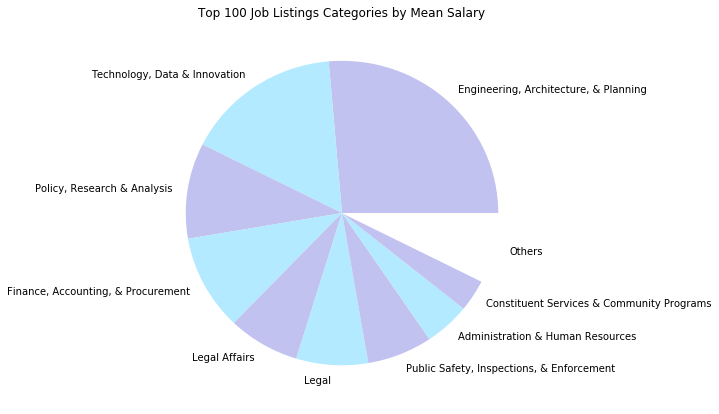

In [12]:
# copy the job_categories_sum datafram so we can combine categories with less than 5 listing into others for better display
job_100_sum_pie = job_categories_top_100_sum.copy()
job_100_sum_pie.loc['Others'] = job_100_sum_pie[9:18].sum()
job_100_sum_pie = job_100_sum_pie.drop(['Community & Business Services','Clerical & Administrative Support', 'Social Services',
                                           'Policy & Analysis','Maintenance & Operations',
                                        'Information Technology & Telecommunications','Health',
                                        'Communications & Intergovernmental Affairs','Building Operations & Maintenance'])
colors = ['#c2c2f0','#b3eaff','#c2c2f0','#b3eaff','#c2c2f0','#b3eaff','#c2c2f0',
          '#b3eaff','#c2c2f0', '#ffffff']
job_100_pie = job_100_sum_pie['Sum of Job Listings'].plot(kind='pie',figsize = (7,7), colors=colors, 
                                                          title = 'Top 100 Job Listings Categories by Mean Salary')
# remove the label on the left side for better display
job_100_pie.set_ylabel('')


The top 100 job listings by mean salary chart displays similar portions relative to the number of jobs avaliable in the market. The few things that we can note is that first, Engineering, Architecture,& Planning along with Technology, Data, & Innovation takes up larger portions of the top 100 highest paying job listing in comparsion to their portions in total job listings. Another key thing to note is that Technology, Data, & Innovation contains the second highest number of job positions in the top 100 job listings by salary when it ranked 4th in total job positions previously.


In [13]:
# Brief overview of overall salary data
(data_sorted.drop(['Job ID'], axis=1)).describe()

,Salary Range From,Salary Range To,Mean Salary
count,1822.000000,1822.000000,1822.000000
mean,61089.031773,87782.889797,74435.960785
std,20020.288234,34085.867920,24568.187139
min,0.000000,31431.000000,27578.500000
25%,49390.000000,63728.000000,56737.500000
50%,57978.000000,80000.000000,70328.750000
75%,70286.000000,104182.000000,89586.000000
max,209585.000000,226366.000000,209585.000000


### Violine plot of mean salary by category
The following is a violin plot of mean salary for the job listings by job category. I first copied and created a dataframe with the salary under the Administration & Human Resources category. Then I added the column Job Category which identifies the category that the salary is associated to. I then appended each of the datafram for each job category to the violin_table and updated the Job Category column with the associated category.

After, I plotted the violin plot with a bw constrain of .1 to prevent inaccurate data representation and potential skew and I added a cut constraint of 0 to only contain the range of the actual data. I aldo adjusted the width of the violin plot to minimize overlapping.

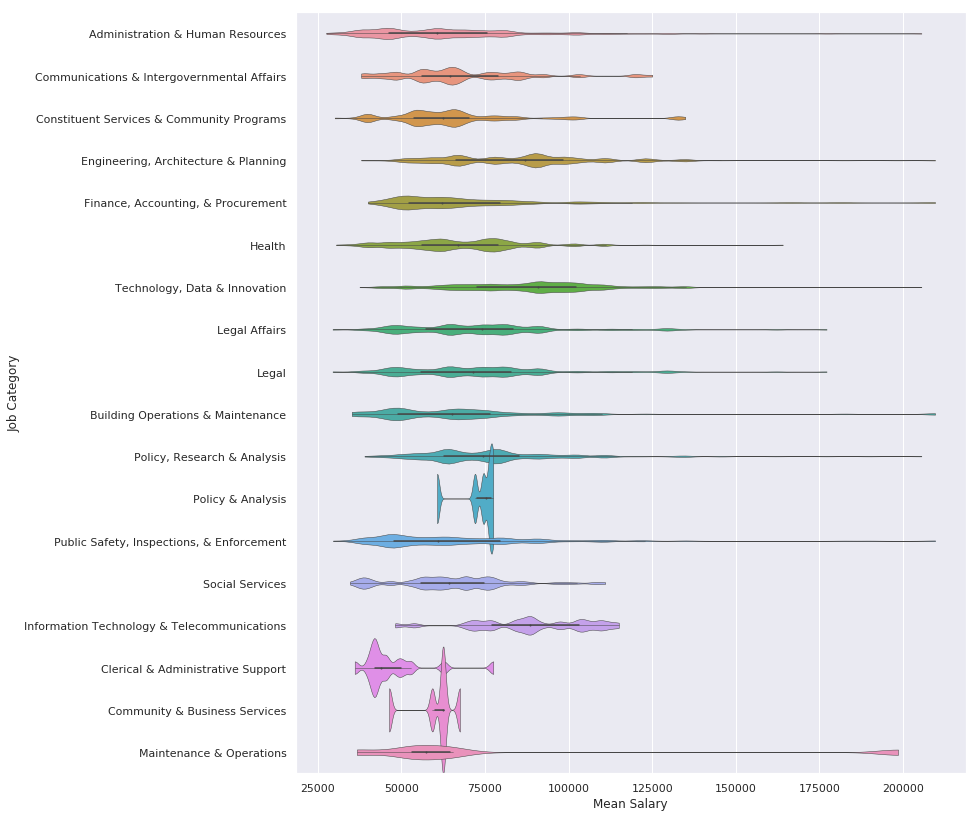

In [14]:
# copy the Administration & Human Resources mean salary to violin_table dataframe
violin_table = admin_human_resource[['Mean Salary']].copy()
# create and update Job Category to Administration & Human Resources
violin_table['Job Category'] = 'Administration & Human Resources'
# list of all dataframes that needs to be appended
listdf= [comm_intergov, const_serv_comm, engr_arch_plann, fin_acc_pro, health, tec_data_inno, legal_affairs, legal, 
         build_op_main, pol_res_analy, policy_analy, pub_saf_ins_enf, soc_serv, info_tec_tel, cler_adm_sup, comm_bus, main_op]
# list of all job categories that needs to be appended
listdfname=['Communications & Intergovernmental Affairs','Constituent Services & Community Programs',
            'Engineering, Architecture & Planning', 'Finance, Accounting, & Procurement', 'Health',
            'Technology, Data & Innovation', 'Legal Affairs', 'Legal', 'Building Operations & Maintenance',
           'Policy, Research & Analysis', 'Policy & Analysis', 'Public Safety, Inspections, & Enforcement',
           'Social Services','Information Technology & Telecommunications','Clerical & Administrative Support',
           'Community & Business Services', 'Maintenance & Operations' ]
# for every pair of dataframe and job category, Append it to the violine table
for index,item in enumerate(listdf):
    violin_table = violin_table.append(item[['Mean Salary']], sort=False,ignore_index=True)
    violin_table['Job Category']  = violin_table['Job Category'].fillna(listdfname[index])

#plot violine plots
sns.set(rc={'figure.figsize':(12,14)})
# cut set to 0 to limit the violin range within the range of the observed data
sns.violinplot(x='Mean Salary', y='Job Category', data=violin_table, linewidth=.5, width=3, bw=.1, cut=0)



The violin plot is able to display the different modes of salary for each of the categories due to its shape which identifies where a large amount of salary is concentrated. However, it is not the best display of medians and a more quantative distribution of salary

### Box plot of mean salary by job categories

A better representation of the median salary along with the interquartile ranges without the skew of outliers is a boxplot. I choose to display the mean salary with a box plot in addition of a violin plot to more clearly identify where the median salary lie in each of the category and have a easier visual comparison of the different categories. 

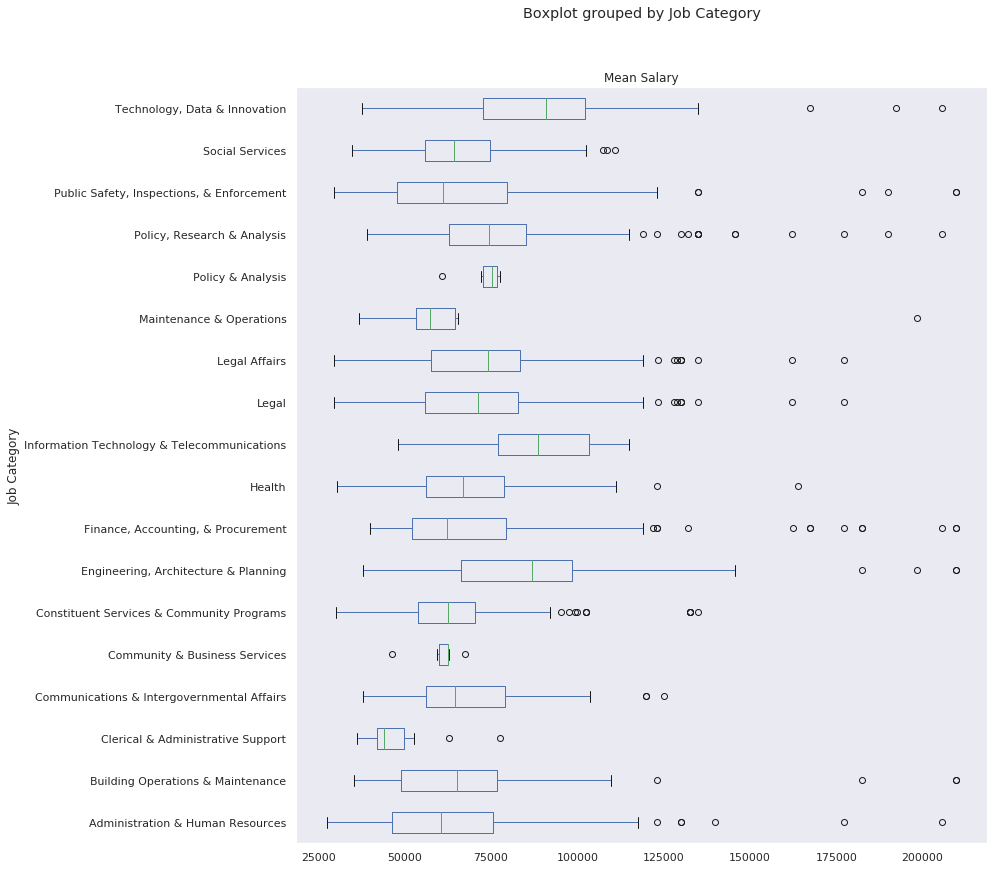

In [15]:
# horizonal box plot with pandas
bp=violin_table.boxplot(by='Job Category', column=['Mean Salary'],  grid=False, vert=False )
# move x label to y axis
bp.set_xlabel('')
bp.set_ylabel('Job Category')
bp


The boxplot allows a much clearer representation of the salary as it disregards the outliers.
It also provides a clear display of mean data and we can see from the box plot alone that techology, data & innovation, Information technology & telecommunications, and Engineering, Architecture & planning are three of the leading categories in mean salary. From the box plot we can also see that Maintenaince & operations in addition to clerical & administrative support are two categories that pay comparatively less than other categories listed.

### Mean salary overview by Job category
The last thing that I would like to look at is the Mean salary overview by Job category using the describe function.
The following displays the general overview mean salary distribution by job category. I also sorted the resulting datafram by salary at 50% (median) for better relative comparison.

In [16]:
# description of mean salary in each category sorted by median of the mean salaries
violin_table.groupby('Job Category').describe().sort_values(by=('Mean Salary', '50%'), ascending=False)

Mean Salary                \
                                                  count          mean   
Job Category                                                            
Technology, Data & Innovation                     262.0  88807.186031   
Information Technology & Telecommunications        26.0  88475.942308   
Engineering, Architecture & Planning              400.0  85810.588450   
Policy & Analysis                                   6.0  72982.416667   
Policy, Research & Analysis                       267.0  77298.062172   
Legal Affairs                                     153.0  74473.777778   
Legal                                             159.0  73650.630189   
Health                                            306.0  68408.496797   
Building Operations & Maintenance                  84.0  69617.815833   
Communications & Intergovernmental Affairs         60.0  68449.200000   
Social Services                                   112.0  64626.678571   
Constituent Services & Community Programs         124.0  65638.745968   
Community & Business Services                       6.0  60096.583333   
Finance, Accounting, & Procurement                192.0  72084.136146   
Public Safety, Inspections, & Enforcement         211.0  67394.750332   
Administration & Human Resources                  170.0  64942.734353   
Maintenance & Operations                            6.0  78092.333333   
Clerical & Administrative Support                  14.0  47828.392857   

                                                                               \
                                                      std      min        25%   
Job Category                                                                    
Technology, Data & Innovation                23035.775522  37500.0  72637.310   
Information Technology & Telecommunications  17362.950503  48146.0  77082.250   
Engineering, Architecture & Planning         24260.834166  37979.5  66430.000   
Policy & Analysis                             6338.134926  60692.5  72644.125   
Policy, Research & Analysis                  23542.282161  38990.0  62693.000   
Legal Affairs                                24028.730350  29438.5  57500.000   
Legal                                        24031.728421  29438.5  55895.000   
Health                                       18029.509750  30493.5  56224.500   
Building Operations & Maintenance            32071.192335  35176.5  49053.500   
Communications & Intergovernmental Affairs   19624.752807  37979.5  56123.625   
Social Services                              16775.620898  34637.5  55768.750   
Constituent Services & Community Programs    20235.935741  30079.5  53834.000   
Community & Business Services                 7235.243530  46352.0  60033.875   
Finance, Accounting, & Procurement           31304.136650  40008.0  52235.750   
Public Safety, Inspections, & Enforcement    27961.737622  29561.0  47719.500   
Administration & Human Resources             25915.552057  27578.5  46283.000   
Maintenance & Operations                     59814.793937  36702.0  53244.000   
Clerical & Administrative Support            10760.360010  36058.5  42033.500   

                                                                              
                                                  50%         75%        max  
Job Category                                                                  
Technology, Data & Innovation                90802.00  102304.750  205479.50  
Information Technology & Telecommunications  88609.75  103249.000  115000.00  
Engineering, Architecture & Planning         86976.50   98407.750  209585.00  
Policy & Analysis                            75381.25   76764.625   77482.00  
Policy, Research & Analysis                  74406.50   85107.500  205479.50  
Legal Affairs                                74169.00   83508.000  177125.50  
Legal                                        71300.50   82860.000  177125.50  
Health            

The top three job categories are Technology, Data & innovation, Information technology & Telecommunications, and Engineering, Architecture & Planning. To my surprise, Technology, Data & innovation and Information technology & Telecommunications, two computer science related job categories, were the leading two job categories that offered higher pay Engineering, Architecture & Planning. This was a surprise as Engineering, Architecture & Planning did have the highest number of top 100 paying job in our dataset as analyzed previously. 

## Conclusion
Data analysis is a useful method to have a deeper and more meaningful look at a dataset. Without analyzing the NYC Government Job dataset with the previous steps, I would not have known many of the key informations that I obtained. I also would not have though that Technology, Data & innovation and Information technology & Telecommunications would have better pay than Engineering, Architecture & Planning which dominated in the number of job listed and number of jobs within the to 100 paying job listed. Without the further analysis, it would be hard to believe that Information technology & Telecommunications would be the second highest paying category when it didnt even make it to the top 100 paying jobs.

I hope that the information that you have learned from this analysis would further motivate any fellow computer science students to value what you are learning and to have a better mindset when taking challenging computer science classes. The skills that you are learning currently are highly valued by society as shown by this salary analysis and you should be proud by what you have accomplished! Dont be discouraged by challenges that you are facing but look at it as a opportunity for growth. 


## Additional information and Useful Links

#### The job search database that this analysis based its data from
http://www.nyc.gov/html/careers/html/search/search.shtml

#### Useful computer science related links
Coding interview practice:
https://leetcode.com/

Crack the coding interview pdf:
https://leonmercanti.com/books/personal-development/Cracking%20the%20Coding%20Interview%20189%20Programming%20Questions%20and%20Solutions.pdf

100+ free data science books: 
https://www.learndatasci.com/free-data-science-books/


#### General job related links
Calculate your market worth:
https://www.paysa.com/

Reviews, Salaries, and Interview help:
https://www.glassdoor.com/index.htm

UMD Job search website: 
https://careers.umd.edu/careers4terps

Job satisfaction (Data Scientist ranked #1):
https://www.careercast.com/jobs-rated/jobs-rated-report-2016-ranking-200-jobs


